In [20]:
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

from sklearn import svm

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'NanumGothicCoding'

from visualize import plot_confusion_matrix

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from pandas import DataFrame

In [21]:
df = pd.read_csv('Data_workshop.csv')
df = df.drop([
            'pid',
             ],
             axis='columns')
print(df.shape)
df.head()

(4128, 37)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,card3_fueltype,card3_class,card3_infra,card3_fuelcost,card3_price,card4_fueltype,card4_class,card4_infra,card4_fuelcost,card4_price
0,3,3,2,31,1,1,10000,3,3,7,...,2,1,50,100,4000,3,0,100,100,4000
1,3,3,2,31,1,1,10000,3,3,7,...,2,1,50,50,4000,3,0,100,50,4000
2,3,3,2,31,1,1,10000,3,3,7,...,2,1,100,50,5000,3,1,100,150,3000
3,3,3,2,31,1,1,10000,3,3,7,...,2,1,100,150,5000,3,0,50,150,5000
4,3,3,2,31,1,1,10000,3,3,7,...,2,0,100,100,2000,3,1,100,50,3000


In [22]:
NUMERICAL_COLUMNS = [
    'policy',
    'eco',
    'tech',
    'age',
    'owning',
    'mileage',
    'family',
    'wealth',
    'recent_buy',
    'oldest_car',

    'card1_infra',
    'card2_infra',
    'card3_infra',
    'card4_infra',
    'card1_fuelcost',
    'card2_fuelcost',
    'card3_fuelcost',
    'card4_fuelcost',
    'card1_price',
    'card2_price',
    'card3_price',
    'card4_price',
]

CATEGORICAL_COLUMNS= [
    'gender',
    'job',
    'own_sedan',
    'own_suv',
    'own_ice',
    'own_zev',
     
    'card1_fueltype',
    'card2_fueltype',
    'card3_fueltype',
    'card4_fueltype',
    'card1_class',
    'card2_class',
    'card3_class',
    'card4_class',

]
TARGET_COLUMNS = [
    'choice',
]

In [23]:
target_names = [
    '10',
    '11',
    '20',
    '21',
    '30',
    '31',
    '40',
    '41',
]

In [24]:
#BINARY = False
TARGET_COLUMN = TARGET_COLUMNS[0]

FEATURE_NAMES = NUMERICAL_COLUMNS[:]
X_numerical = df[NUMERICAL_COLUMNS].values

num_categories = []
X_categorical = []
for column in CATEGORICAL_COLUMNS:
    df_column = df[column]
    X_column = df_column.map({value:i for i, value in enumerate(sorted(list(set(df_column))))}).values
    X_categorical.append(X_column.reshape(-1, 1))
    num_categories.append(len(set(X_column)))
#    print(FEATURE_NAMES)
#    print(column)
#    print(df_column)
    FEATURE_NAMES += [column + '_' + str(value) for value in sorted(list(set(df_column)))]
X_categorical = np.hstack(X_categorical)

one_hot_encoder = OneHotEncoder()
X_categorical = one_hot_encoder.fit_transform(
    X_categorical
).toarray()
assert sum(num_categories) == X_categorical.shape[1]

X = np.hstack([X_numerical, X_categorical])
assert X.shape[1] == len(FEATURE_NAMES)

# if BINARY:
#     y = (df[TARGET_COLUMN].values == 4).astype(np.int32)
# else:
#     y = df[TARGET_COLUMN].values

y = df[TARGET_COLUMN]
#y, target_names = y.factorize()

print(X.shape, y.shape)

(4128, 53) (4128,)


In [25]:
Counter(y)

Counter({10: 1994, 21: 1252, 30: 243, 11: 368, 20: 90, 31: 130, 41: 6, 40: 45})

In [26]:
len(FEATURE_NAMES)

53

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
Counter(y_test)

Counter({10: 603, 21: 359, 11: 105, 40: 15, 20: 28, 30: 76, 31: 50, 41: 3})

In [29]:
print(target_names)

['10', '11', '20', '21', '30', '31', '40', '41']


In [30]:
Counter(y_train)

Counter({10: 1391, 21: 893, 30: 167, 11: 263, 20: 62, 40: 30, 41: 3, 31: 80})

In [31]:
clf = RandomForestClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

          10       0.72      0.91      0.81       603
          11       0.67      0.38      0.48       105
          20       0.38      0.21      0.27        28
          21       0.66      0.64      0.65       359
          30       0.19      0.04      0.07        76
          31       0.58      0.36      0.44        50
          40       0.38      0.20      0.26        15
          41       0.00      0.00      0.00         3

    accuracy                           0.68      1239
   macro avg       0.45      0.34      0.37      1239
weighted avg       0.65      0.68      0.65      1239



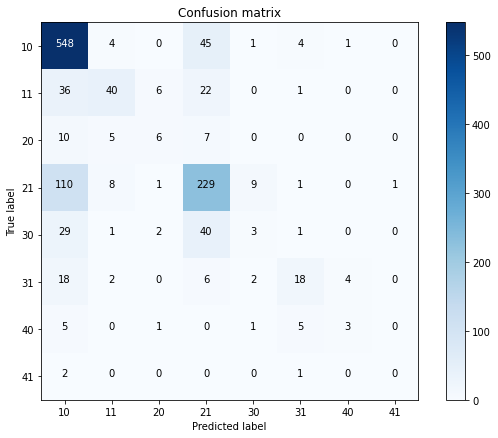

In [32]:
print(classification_report(y_test, y_pred, target_names=target_names,))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, )

In [33]:
clf = LogisticRegression()
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

          10       0.51      0.92      0.66       603
          11       0.00      0.00      0.00       105
          20       0.00      0.00      0.00        28
          21       0.31      0.13      0.18       359
          30       0.00      0.00      0.00        76
          31       0.00      0.00      0.00        50
          40       0.00      0.00      0.00        15
          41       0.00      0.00      0.00         3

    accuracy                           0.49      1239
   macro avg       0.10      0.13      0.10      1239
weighted avg       0.34      0.49      0.37      1239



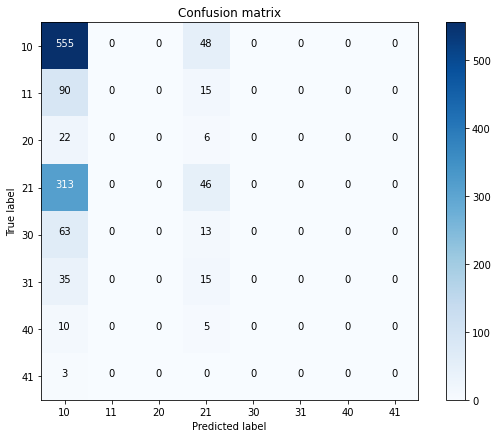

In [34]:
print(classification_report(y_test, y_pred, target_names=target_names,))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, )

# Market Simulation

In [46]:
x_simulation = pd.read_csv('Data_marketsimulation_4fueltypes.csv')
x_simulation = x_simulation.drop([
            'pid',
             ],
             axis='columns')
print(x_simulation.shape)

(516, 36)


In [47]:
#BINARY = False
#TARGET_COLUMN = TARGET_COLUMNS[0]

FEATURE_NAMES = NUMERICAL_COLUMNS[:]
X_numerical = x_simulation[NUMERICAL_COLUMNS].values

num_categories = []
X_categorical = []
for column in CATEGORICAL_COLUMNS:
    df_column = x_simulation[column]
    X_column = df_column.map({value:i for i, value in enumerate(sorted(list(set(df_column))))}).values
    X_categorical.append(X_column.reshape(-1, 1))
    num_categories.append(len(set(X_column)))
#    print(FEATURE_NAMES)
#    print(column)
#    print(df_column)
    FEATURE_NAMES += [column + '_' + str(value) for value in sorted(list(set(df_column)))]
X_categorical = np.hstack(X_categorical)

one_hot_encoder = OneHotEncoder()
X_categorical = one_hot_encoder.fit_transform(
    X_categorical
).toarray()
assert sum(num_categories) == X_categorical.shape[1]

x_simulation = np.hstack([X_numerical, X_categorical])
assert X.shape[1] == len(FEATURE_NAMES)

# if BINARY:
#     y = (df[TARGET_COLUMN].values == 4).astype(np.int32)
# else:
#     y = df[TARGET_COLUMN].values

#y = df[TARGET_COLUMN]
#y, target_names = y.factorize()

print(x_simulation.shape)

(516, 53)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

In [49]:
clf = RandomForestClassifier()
y_pred = clf.fit(X_train, y_train).predict(x_simulation)

In [52]:
df = DataFrame(y_pred)
df.to_csv("G:\\내 드라이브\\내 모든 파일들\\1_연구\\TEMEP\\Data and Codes\\simulation_result.csv",header=False,index=False,sep=',')

In [53]:
Counter(y_pred)

Counter({21: 167, 10: 250, 11: 45, 30: 24, 31: 15, 20: 11, 40: 4})

In [67]:
x_simulation_100 = pd.read_csv('Data_marketsimulation_4fueltypes_100.csv')
x_simulation_100 = x_simulation_100.drop([
            'pid',
             ],
             axis='columns')
print(x_simulation_100.shape)

(516, 36)


In [68]:
#BINARY = False
#TARGET_COLUMN = TARGET_COLUMNS[0]

FEATURE_NAMES = NUMERICAL_COLUMNS[:]
X_numerical = x_simulation_100[NUMERICAL_COLUMNS].values

num_categories = []
X_categorical = []
for column in CATEGORICAL_COLUMNS:
    df_column = x_simulation_100[column]
    X_column = df_column.map({value:i for i, value in enumerate(sorted(list(set(df_column))))}).values
    X_categorical.append(X_column.reshape(-1, 1))
    num_categories.append(len(set(X_column)))
#    print(FEATURE_NAMES)
#    print(column)
#    print(df_column)
    FEATURE_NAMES += [column + '_' + str(value) for value in sorted(list(set(df_column)))]
X_categorical = np.hstack(X_categorical)

one_hot_encoder = OneHotEncoder()
X_categorical = one_hot_encoder.fit_transform(
    X_categorical
).toarray()
assert sum(num_categories) == X_categorical.shape[1]

x_simulation_100 = np.hstack([X_numerical, X_categorical])
assert X.shape[1] == len(FEATURE_NAMES)

# if BINARY:
#     y = (df[TARGET_COLUMN].values == 4).astype(np.int32)
# else:
#     y = df[TARGET_COLUMN].values

#y = df[TARGET_COLUMN]
#y, target_names = y.factorize()

print(x_simulation_100.shape)

(516, 53)


In [69]:
clf = RandomForestClassifier()
y_pred = clf.fit(X_train, y_train).predict(x_simulation_100)

In [70]:
Counter(y_pred)

Counter({21: 179, 10: 256, 11: 42, 30: 11, 31: 18, 20: 8, 40: 2})